# Dataset

In [20]:
DATASET = {'20Hz_condition':[\
                              {'Control':['nm02Mar2018c0_000_ctrl.h5'],
                               'Tricine':['nm02Mar2018c0_001_tricine.h5']},
                              {'Control':['nm02Mar2018c1_000_ctrl.h5'],
                               'Tricine':['nm02Mar2018c1_002_tricine.h5']},
                              {'Control':['nm02Mar2018c2_000_ctrl.h5'],
                               'Tricine':['nm02Mar2018c2_002_tricine.h5']},
                              {'Control':['nm30Mar2018c1_000_ctrl.h5'],
                               'Tricine':['nm30Mar2018c1_004_tricine.h5']},
                              {'Control':['nm17Apr2019c1_000_ctrl.h5'],
                               'Tricine':['nm17Apr2019c1_001_tricine.h5']}],
           '3Hz_condition':[\
                             {'Control':['nm18Sep2019c1_000.h5'],
                              'Tricine':['nm18Sep2019c1_001.h5']},
                             {'Control':['nm19Sep2019c1_001.h5'],
                              'Tricine':['nm19Sep2019c1_002.h5']},
                             {'Control':['nm20Sep2019c1_001.h5'],
                              'Tricine':['nm20Sep2019c1_003.h5']},
                             {'Control':['nm30Aug2019c0_000.h5'],
                              'Tricine':['nm30Aug2019c0_002.h5']},
                             {'Control':['nm18Sep2019c4_000.h5'],
                              'Tricine':['nm18Sep2019c4_003.h5']},
                             {'Control':['nm19Sep2019c2_001.h5'],
                              'Tricine':['nm19Sep2019c2_004.h5']},
                             {'Control':['nm23Sep2019c2_001.h5'],
                              'Tricine':['nm23Sep2019c2_002.h5']},
            ],
}


In [22]:
import os, sys
import numpy as np
# custom import for Igor-exported HDF5 files
# sys.path.append('../cortical-physio-icm/electrophy/IO')
from analyz.IO.igor import load_hdf5_exported_from_Igor as load_data

In [69]:
root_folder = '/media/yann/DATADRIVE1/DATA/Data_Nunzio/'
fn = os.path.join(root_folder, filename_to_path(DATASET['20Hz_condition'][1]['Control'][0]))
data_ctrl = load_data(fn, dt_subsampling=0.1)

- temporal sampling, original time step: 0.010ms
    --> subsampled at 0.010ms
- Recordings channels:
  * 0) Irecording2 in nA
- Stimulation channels:
  * 0) Vcommand2 in mV
  * 1) stim in V


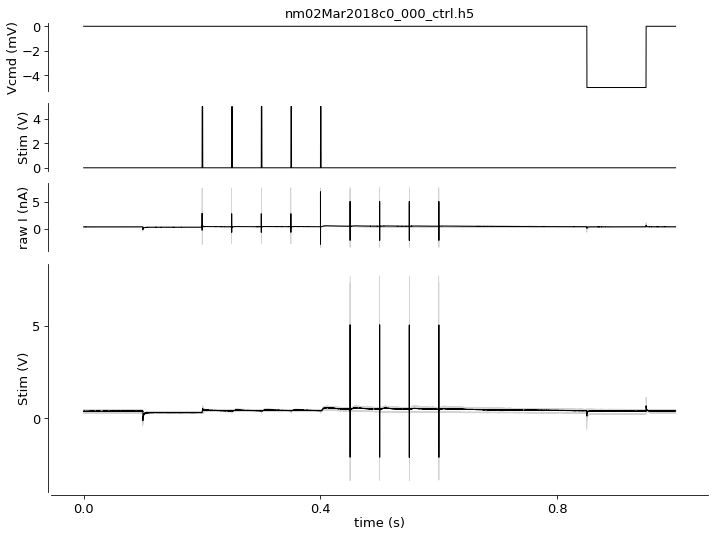

In [79]:

def abbrev_to_month(abbrev):
    M = ['January', 'February', 'March', 'April', 'May',\
         'June', 'July', 'August', 'September', 'October',\
         'November', 'December']
    for m in M:
        if (m[:3].lower()==abbrev.lower()):
            return m
    
def filename_to_path(filename):
    day, month, year = filename[2:4], filename[4:7], filename[7:11]
    cell = filename[11:13]
    cond = filename[14:17]
    return os.path.join(year, abbrev_to_month(month), filename[:13], filename)

def LoadData(protocol,
              iexp=0, condition='Control', irec=0,
              dt_subampling=0):

    fn = os.path.join(root_folder, filename_to_path(DATASET[protocol][0][condition][0]))
    data = load_data(fn, dt_subsampling=dt_subampling, verbose=True)
    data['filename'] = fn
    if protocol=='20Hz_condition':
        data['Irec_key'] = 'Irecording2'
        data['Vcmd_key'] = 'Vcommand2'
        data['stim_key'] = 'stim'
    else:
        data['Irec_key'] = 'Irecording'
        data['Vcmd_key'] = 'Vcommand'
        data['stim_key'] = 'Stimulator'
        
    return data

def remove_stimulation_artefact(D, stim_threshold=1.):
    # now blanking the stimulus period
    cond = (np.abs(D['stimulations'][D['stim_key']])>stim_threshold)
    D['recordings']['Irecording_clean'] = 1.*D['recordings'][D['Irec_key']]
    for i in range(D['recordings'][D['Irec_key']].shape[0]):
        D['recordings']['Irecording_clean'][i,:][cond] = D['recordings'][D['Irec_key']][i,:][-1]
    return D

data = LoadData('20Hz_condition', iexp=0, condition='Control')
data = remove_stimulation_artefact(data)
plot_protocol(data)

In [29]:
from analyz.IO.hdf5 import load_dict_from_hdf5
D = load_dict_from_hdf5(fn)

(<Figure size 907.087x521.575 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f8cb1b01b10>)

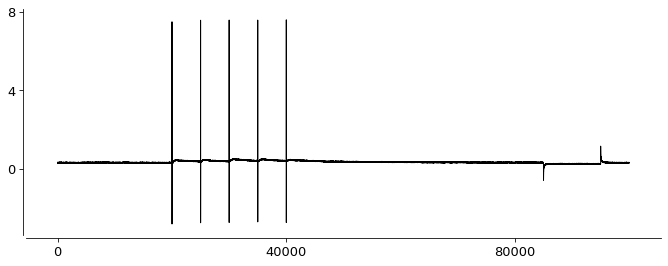

In [66]:
ge.plot(D['RecordA14'], fig_args={'figsize':(2,2)})

In [28]:
data['recordings']

{'Irecording2': array([[0.37969681, 0.37969681, 0.37776481, ..., 0.41704897, 0.40803293,
         0.40674492],
        [0.38678084, 0.38098482, 0.36874877, ..., 0.424777  , 0.424777  ,
         0.42155698],
        [0.40481292, 0.40416891, 0.4003049 , ..., 0.44152107, 0.43830105,
         0.43057302],
        ...,
        [0.27327347, 0.27713871, 0.2861576 , ..., 0.29646491, 0.29968594,
         0.30226277],
        [0.29388808, 0.29775332, 0.29324387, ..., 0.29839753, 0.28229236,
         0.27391767],
        [0.30033015, 0.30161856, 0.29839753, ..., 0.30870483, 0.31192587,
         0.31579111]]),
 'Irecording_clean': array([[0.37969681, 0.37969681, 0.37776481, ..., 0.41704897, 0.40803293,
         0.40674492],
        [0.38678084, 0.38098482, 0.36874877, ..., 0.424777  , 0.424777  ,
         0.42155698],
        [0.40481292, 0.40416891, 0.4003049 , ..., 0.44152107, 0.43830105,
         0.43057302],
        ...,
        [0.27327347, 0.27713871, 0.2861576 , ..., 0.29646491, 0.29968594,

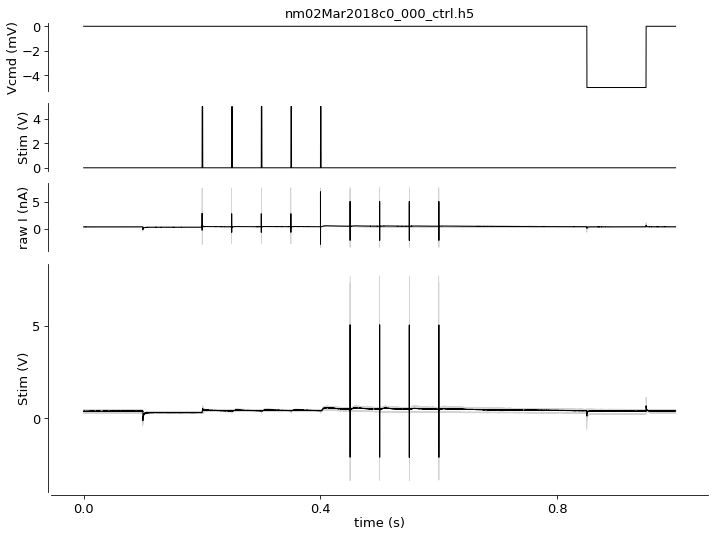

In [27]:
from datavyz import gen as ge
def plot_protocol(D):
    fig, AX = ge.figure(axes_extents=[[[3,1]] for i in range(3)]+[[[3,3]]], hspace=0.3, figsize=(1,.6))
    ge.title(AX[0], D['filename'].split(os.path.sep)[-1])
    ge.plot(1e-3*D['t'], D['stimulations'][D['Vcmd_key']], ax=AX[0], axes_args={'spines':['left'], 'ylabel':'Vcmd (mV)'})
    ge.plot(1e-3*D['t'], D['stimulations'][D['stim_key']], ax=AX[1], axes_args={'spines':['left'], 'ylabel':'Stim (V)'})
    for i in range(D['recordings'][D['Irec_key']].shape[0]):
        AX[2].plot(1e-3*D['t'], D['recordings'][D['Irec_key']][i,:], color='lightgray', lw=0.3) 
    ge.plot(1e-3*D['t'], D['recordings'][D['Irec_key']].mean(axis=0), ax=AX[2],
            axes_args={'spines':['left'], 'ylabel':'raw I (nA)'})
    # now blanking the stimulus period
    cond = (D['stimulations'][D['stim_key']]>1)
    for i in range(D['recordings'][D['Irec_key']].shape[0]):
        AX[3].plot(1e-3*D['t'], D['recordings']['Irecording_clean'][i,:], color='lightgray', lw=0.3) 
    ge.plot(1e-3*D['t'], D['recordings']['Irecording_clean'].mean(axis=0), ax=AX[3],
            axes_args={'xlabel':'time (s)', 'ylabel':'Stim (V)'})

    
plot_protocol(data)

In [9]:

DATASET = {'20Hz_condition':[\
                              {'Control':['nm02Mar2018c0_000_ctrl.h5'],
                               'Tricine':['nm02Mar2018c0_001_tricine.h5']},
                              {'Control':['nm02Mar2018c1_000_ctrl.h5'],
                               'Tricine':['nm02Mar2018c1_002_tricine.h5']},
                              {'Control':['nm02Mar2018c2_000_ctrl.h5'],
                               'Tricine':['nm02Mar2018c2_002_tricine.h5']},
                              {'Control':['nm30Mar2018c1_000_ctrl.h5'],
                               'Tricine':['nm30Mar2018c1_004_tricine.h5']},
                              {'Control':['nm17Apr2019c1_000_ctrl.h5'],
                               'Tricine':['nm17Apr2019c1_001_tricine.h5']}],
           '3Hz_condition':[\
                             {'Control':['nm18Sep2019c1_000.h5'],
                              'Tricine':['nm18Sep2019c1_001.h5']},
                             {'Control':['nm19Sep2019c1_001.h5'],
                              'Tricine':['nm19Sep2019c1_002.h5']},
                             {'Control':['nm20Sep2019c1_001.h5'],
                              'Tricine':['nm20Sep2019c1_003.h5']},
                             {'Control':['nm30Aug2019c0_000.h5'],
                              'Tricine':['nm30Aug2019c0_002.h5']},
                             {'Control':['nm18Sep2019c4_000.h5'],
                              'Tricine':['nm18Sep2019c4_003.h5']},
                             {'Control':['nm19Sep2019c2_001.h5'],
                              'Tricine':['nm19Sep2019c2_004.h5']},
                             {'Control':['nm23Sep2019c2_001.h5'],
                              'Tricine':['nm23Sep2019c2_002.h5']},
            ],
}


In [10]:
def protocol_comparison(DATA,
                        labels=['Control', 'Tricine'],
                        colors=['k', ge.green]):
    fig, AX = ge.figure(axes=(1,3), figsize=(2,1.3), hspace=0.3)
    for data, c in zip(DATA, colors):
        AX[0].plot(1e-3*data['t'], data['Irecording'].mean(axis=0), color=c)
    ge.set_plot(AX[0], ['left'], ylabel='raw-I (nA)')

    for data, label, c in zip(DATA, labels, colors):
        tcond = (data['t']>250)
        baseline_cond = (data['t']>300) & (data['t']<390)
        baseline = data['Irecording_clean'].mean(axis=0)[baseline_cond].mean()
        trace = data['Irecording_clean'].mean(axis=0)[tcond]-baseline
        
        AX[1].plot(1e-3*data['t'][tcond], trace, color=c, label=label)
        AX[2].plot(1e-3*data['t'][tcond], trace/trace.max(), color=c, label=label)
        
    ge.set_plot(AX[1], ['left'], ylabel='I (nA)\n (-baseline&stim)')
    ge.set_plot(AX[2], xlabel='time (s)', ylabel='I (nA)\n (-baseline&stim)\n (+rescaled)')
    
    ge.legend(AX[1])
    return fig, AX
